<a href="https://colab.research.google.com/github/anmoladh/git/blob/master/modeldetection_smarttv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import joblib

# Load the trained model and scaler
model = joblib.load('/content/random_forest_model.pkl')
scaler = joblib.load('/content/feature_scaler.pkl')

print("Model and scaler loaded successfully.")


Model and scaler loaded successfully.


In [9]:
import pandas as pd
# Load the network log data
logs = pd.read_csv('/content/normallogs.csv')

print("Logs loaded successfully.")
display(logs.head())

Logs loaded successfully.


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,Intel_60:32:6d,Broadcast,ARP,60,Who has 192.168.1.67? Tell 192.168.1.188
1,2,0.964516,Intel_60:32:6d,Broadcast,ARP,60,Who has 192.168.1.67? Tell 192.168.1.188
2,3,1.618152,TaicangT&WEl_9f:e7:30,Broadcast,ARP,60,Who has 192.168.1.188? Tell 192.168.1.254
3,4,1.964172,Intel_60:32:6d,Broadcast,ARP,60,Who has 192.168.1.67? Tell 192.168.1.188
4,5,3.001430,Intel_60:32:6d,Broadcast,ARP,60,Who has 192.168.1.67? Tell 192.168.1.188


In [10]:
# Define the expected feature columns based on training data
expected_columns = [
    'source_port', 'destination_port', 'packet_size', 'duration', 'num_packets',
    'num_bytes', 'response_time', 'anomaly_score', 'dns_requests', 'http_requests',
    'data_exfiltration'
]

# Ensure all expected columns are present (fill missing with 0)
for col in expected_columns:
    if col not in logs.columns:
        logs[col] = 0

# Reorder columns to match model input order
log_data = logs[expected_columns]

# Scale the data using the trained scaler
scaled_log_data = scaler.transform(log_data)


In [11]:
# Predict anomalies using the trained model
predictions = model.predict(scaled_log_data)

# Map predictions to attack types
attack_labels = {0: 'Normal', 1: 'DDoS', 2: 'Ping Flood'}  # Modify as needed
logs['Prediction'] = [attack_labels.get(pred, 'Unknown') for pred in predictions]

# Display a few predictions
display(logs[['Time', 'Source', 'Destination']].head(10))

,Time,Source,Destination
0,0.000000,Intel_60:32:6d,Broadcast
1,0.964516,Intel_60:32:6d,Broadcast
2,1.618152,TaicangT&WEl_9f:e7:30,Broadcast
3,1.964172,Intel_60:32:6d,Broadcast
4,3.001430,Intel_60:32:6d,Broadcast
5,3.965558,Intel_60:32:6d,Broadcast
6,4.676897,fe80::1,fe80::a00:27ff:fe6e:136e
7,4.676918,fe80::a00:27ff:fe6e:136e,fe80::1
8,4.965788,Intel_60:32:6d,Broadcast
9,6.115209,TaicangT&WEl_9f:e7:30,Broadcast


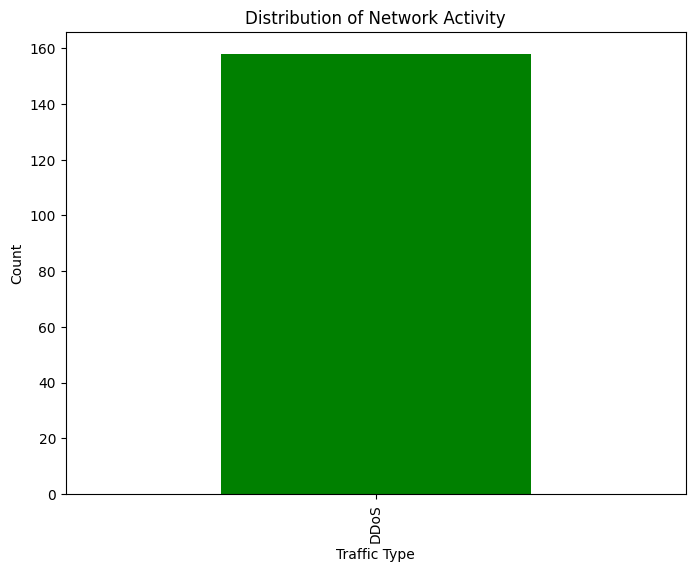

In [12]:
import matplotlib.pyplot as plt

# Count predictions
counts = logs['Prediction'].value_counts()

# Plot bar chart
plt.figure(figsize=(8, 6))
counts.plot(kind='bar', color=['green', 'red', 'orange'])
plt.title('Distribution of Network Activity')
plt.xlabel('Traffic Type')
plt.ylabel('Count')
plt.show()


In [13]:
import plotly.express as px

# Plot timeline of anomalies using timestamps and anomaly scores
fig = px.scatter(logs, x='Time', y='anomaly_score', color='Prediction',
                 title='Anomalies Over Time', labels={'timestamp': 'Time', 'anomaly_score': 'Anomaly Score'})
fig.show()


In [14]:
# Trigger alerts for anomalies
for index, row in logs.iterrows():
    if row['Prediction'] != 'Normal':
        print(f"🚨 ALERT: {row['Prediction']} detected!")
        print(f"Timestamp: {row['Time']}, Source IP: {row['Source']}, Destination IP: {row['Destination']}")


🚨 ALERT: DDoS detected!
Timestamp: 0.0, Source IP: Intel_60:32:6d, Destination IP: Broadcast
🚨 ALERT: DDoS detected!
Timestamp: 0.964516433, Source IP: Intel_60:32:6d, Destination IP: Broadcast
🚨 ALERT: DDoS detected!
Timestamp: 1.618152127, Source IP: TaicangT&WEl_9f:e7:30, Destination IP: Broadcast
🚨 ALERT: DDoS detected!
Timestamp: 1.964172424, Source IP: Intel_60:32:6d, Destination IP: Broadcast
🚨 ALERT: DDoS detected!
Timestamp: 3.001429592, Source IP: Intel_60:32:6d, Destination IP: Broadcast
🚨 ALERT: DDoS detected!
Timestamp: 3.965558059, Source IP: Intel_60:32:6d, Destination IP: Broadcast
🚨 ALERT: DDoS detected!
Timestamp: 4.67689676, Source IP: fe80::1, Destination IP: fe80::a00:27ff:fe6e:136e
🚨 ALERT: DDoS detected!
Timestamp: 4.676917528, Source IP: fe80::a00:27ff:fe6e:136e, Destination IP: fe80::1
🚨 ALERT: DDoS detected!
Timestamp: 4.965787696, Source IP: Intel_60:32:6d, Destination IP: Broadcast
🚨 ALERT: DDoS detected!
Timestamp: 6.115209431, Source IP: TaicangT&WEl_9f:e7